# Loan Interest Rate Data Exploration and Analysis

## The overall analysis is divided into two parts:
### 1) Data Cleaning, Transformation and Exploration
### 2) Building and Running Machine Learning model

## 1) Data Cleaning, Transformation and Exploration

#### Loading all the libraries and function that we will need.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from seaborn import countplot
from matplotlib.pyplot import figure, show
import seaborn as sns
%matplotlib inline

#### Uploading the data as dataframe and renaming the columns into more informative names.

In [2]:
new_cols = ['Int_Rate', 'Loan _ID','Cust_ID','Amt_Req','Amt_Fun','Inv_Por','Loan_Duration','Loan_Grade','Loan_Subgrade','Cust_Title',
'Cust_Exp','Owner_Status','Cust_Income','VerCust_Income','Loan_Date','Loan_Reason','Loan_Cat','Loan_Title','Cust_State','Debt_Ratio',
'CustDelin_2Yrs', 'Cust_ageofcredit','CustNoDelin_mnths','Cust_PubRec','Cust_DerPubRec','Cust_CreditLine','Cust_LoanStatus']
data1 = pd.read_csv('loan_interest_rates.csv', skiprows=1, header =None, names=new_cols)

C:\Users\Nirav\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Exploring the content of data

In [3]:
data1.head()

,Int_Rate,Loan _ID,Cust_ID,Amt_Req,Amt_Fun,Inv_Por,Loan_Duration,Loan_Grade,Loan_Subgrade,Cust_Title,...,Loan_Title,Cust_State,Debt_Ratio,CustDelin_2Yrs,Cust_ageofcredit,CustNoDelin_mnths,Cust_PubRec,Cust_DerPubRec,Cust_CreditLine,Cust_LoanStatus
0,0.1189,54734.0,80364.0,25000.0,25000.0,19080.0,36 months,B,B4,NaN,...,Debt consolidation for on-time payer,CA,19.48,0.0,2/1/1994,NaN,NaN,0.0,42.0,f
1,0.1071,55742.0,114426.0,7000.0,7000.0,673.0,36 months,B,B5,CNN,...,Credit Card payoff,NY,14.29,0.0,10/1/2000,NaN,NaN,0.0,7.0,f
2,0.1699,57167.0,137225.0,25000.0,25000.0,24725.0,36 months,D,D3,Web Programmer,...,mlue,NY,10.50,0.0,6/1/2000,41.0,NaN,0.0,17.0,f
3,0.1311,57245.0,138150.0,1200.0,1200.0,1200.0,36 months,C,C2,city of beaumont texas,...,zxcvb,TX,5.47,0.0,1/1/1985,64.0,NaN,0.0,31.0,f
4,0.1357,57416.0,139635.0,10800.0,10800.0,10692.0,36 months,C,C3,State Farm Insurance,...,Nicolechr1978,CT,11.63,0.0,12/1/1996,58.0,NaN,0.0,40.0,f


In [4]:
data1.shape

(400000, 27)

### Data Cleaning: Dropping unwanted columns
The data is about interest rates of loans for different customers. I will analyze the data as if we were to predict interest rates of loan for customers based on the variables provided. After going through each column of the data, it seems that their are several columns which may not provided any useful information in determining the interest rates. Such columns are unique ID of loan and borrower, Investor funded portion of loan, loan subgrade, job title, income verified, reason for loan, loan title, number of months since last delinquency and number of months since public record. Each of this columns do provide some information but it is not very useful for determing interest rates. Hence, I will remove this 10 columns from the data.

In [5]:
data1.drop(['Loan _ID', 'Cust_ID', 'Inv_Por', 'Loan_Subgrade', 'Cust_Title', 'VerCust_Income', 'Loan_Reason', 'Loan_Title', 'CustNoDelin_mnths', 'Cust_PubRec'], axis=1, inplace=True)

In [6]:
data1.shape

(400000, 17)

In [7]:
data1.head()

,Int_Rate,Amt_Req,Amt_Fun,Loan_Duration,Loan_Grade,Cust_Exp,Owner_Status,Cust_Income,Loan_Date,Loan_Cat,Cust_State,Debt_Ratio,CustDelin_2Yrs,Cust_ageofcredit,Cust_DerPubRec,Cust_CreditLine,Cust_LoanStatus
0,0.1189,25000.0,25000.0,36 months,B,< 1 year,RENT,85000.0,8/9/2019,debt_consolidation,CA,19.48,0.0,2/1/1994,0.0,42.0,f
1,0.1071,7000.0,7000.0,36 months,B,< 1 year,RENT,65000.0,5/8/2019,credit_card,NY,14.29,0.0,10/1/2000,0.0,7.0,f
2,0.1699,25000.0,25000.0,36 months,D,1 year,RENT,70000.0,8/14/2019,debt_consolidation,NY,10.50,0.0,6/1/2000,0.0,17.0,f
3,0.1311,1200.0,1200.0,36 months,C,10+ years,OWN,54000.0,3/10/2019,debt_consolidation,TX,5.47,0.0,1/1/1985,0.0,31.0,f
4,0.1357,10800.0,10800.0,36 months,C,6 years,RENT,32000.0,11/9/2019,debt_consolidation,CT,11.63,0.0,12/1/1996,0.0,40.0,f


### Data Cleaning: 
Remove all the rows which contains any missing values, as they will interfer in the model

In [8]:
data1.dropna().head()

,Int_Rate,Amt_Req,Amt_Fun,Loan_Duration,Loan_Grade,Cust_Exp,Owner_Status,Cust_Income,Loan_Date,Loan_Cat,Cust_State,Debt_Ratio,CustDelin_2Yrs,Cust_ageofcredit,Cust_DerPubRec,Cust_CreditLine,Cust_LoanStatus
0,0.1189,25000.0,25000.0,36 months,B,< 1 year,RENT,85000.0,8/9/2019,debt_consolidation,CA,19.48,0.0,2/1/1994,0.0,42.0,f
1,0.1071,7000.0,7000.0,36 months,B,< 1 year,RENT,65000.0,5/8/2019,credit_card,NY,14.29,0.0,10/1/2000,0.0,7.0,f
2,0.1699,25000.0,25000.0,36 months,D,1 year,RENT,70000.0,8/14/2019,debt_consolidation,NY,10.50,0.0,6/1/2000,0.0,17.0,f
3,0.1311,1200.0,1200.0,36 months,C,10+ years,OWN,54000.0,3/10/2019,debt_consolidation,TX,5.47,0.0,1/1/1985,0.0,31.0,f
4,0.1357,10800.0,10800.0,36 months,C,6 years,RENT,32000.0,11/9/2019,debt_consolidation,CT,11.63,0.0,12/1/1996,0.0,40.0,f


In [9]:
data2 = data1.dropna().reset_index(drop=True)

In [10]:
data2.shape

(196778, 17)

In [11]:
data2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196778 entries, 0 to 196777
Data columns (total 17 columns):
Int_Rate            196778 non-null float64
Amt_Req             196778 non-null float64
Amt_Fun             196778 non-null float64
Loan_Duration       196778 non-null object
Loan_Grade          196778 non-null object
Cust_Exp            196778 non-null object
Owner_Status        196778 non-null object
Cust_Income         196778 non-null float64
Loan_Date           196778 non-null object
Loan_Cat            196778 non-null object
Cust_State          196778 non-null object
Debt_Ratio          196778 non-null float64
CustDelin_2Yrs      196778 non-null float64
Cust_ageofcredit    196778 non-null object
Cust_DerPubRec      196778 non-null float64
Cust_CreditLine     196778 non-null float64
Cust_LoanStatus     196778 non-null object
dtypes: float64(8), object(9)
memory usage: 25.5+ MB


In [12]:
data2.head(10)

,Int_Rate,Amt_Req,Amt_Fun,Loan_Duration,Loan_Grade,Cust_Exp,Owner_Status,Cust_Income,Loan_Date,Loan_Cat,Cust_State,Debt_Ratio,CustDelin_2Yrs,Cust_ageofcredit,Cust_DerPubRec,Cust_CreditLine,Cust_LoanStatus
0,0.1189,25000.0,25000.0,36 months,B,< 1 year,RENT,85000.0,8/9/2019,debt_consolidation,CA,19.48,0.0,2/1/1994,0.0,42.0,f
1,0.1071,7000.0,7000.0,36 months,B,< 1 year,RENT,65000.0,5/8/2019,credit_card,NY,14.29,0.0,10/1/2000,0.0,7.0,f
2,0.1699,25000.0,25000.0,36 months,D,1 year,RENT,70000.0,8/14/2019,debt_consolidation,NY,10.50,0.0,6/1/2000,0.0,17.0,f
3,0.1311,1200.0,1200.0,36 months,C,10+ years,OWN,54000.0,3/10/2019,debt_consolidation,TX,5.47,0.0,1/1/1985,0.0,31.0,f
4,0.1357,10800.0,10800.0,36 months,C,6 years,RENT,32000.0,11/9/2019,debt_consolidation,CT,11.63,0.0,12/1/1996,0.0,40.0,f
5,0.1905,7200.0,7200.0,36 months,D,9 years,RENT,58000.0,8/12/2019,debt_consolidation,RI,2.05,0.0,4/1/1994,0.0,25.0,f
6,0.1008,7500.0,5025.0,36 months,B,3 years,RENT,85000.0,4/8/2019,debt_consolidation,CA,8.10,0.0,11/1/2000,0.0,11.0,f
7,0.1426,3000.0,3000.0,36 months,C,3 years,MORTGAGE,80800.0,9/9/2019,credit_card,TX,14.97,1.0,7/1/1998,0.0,23.0,f
8,0.0788,4000.0,4000.0,36 months,A,< 1 year,MORTGAGE,148000.0,2/10/2019,credit_card,TX,16.98,0.0,5/1/1993,0.0,19.0,f
9,0.1496,5600.0,5600.0,36 months,D,1 year,RENT,45000.0,2/10/2019,debt_consolidation,MD,4.00,0.0,6/1/2019,1.0,9.0,f


### Data Transformation: Years of experience of customer
For Cust_Exp column, the values are combination of numbers, alphabets and symbols. Hence, it is better to convert them into numerical format such as 1,2,3..10 years. We don't have exact number of years of experience after 10 yrs, hence all the 10+ years will be convert to 10 years. Also, their won't be any significant difference in interest rate for someone with experience of 10 years versus 15 years.

In [13]:
data2.Cust_Exp.fillna(value=0,inplace=True)
data2['Cust_Exp'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
data2['Cust_Exp'] = data2['Cust_Exp'].astype(int)

In [14]:
data2.head()

,Int_Rate,Amt_Req,Amt_Fun,Loan_Duration,Loan_Grade,Cust_Exp,Owner_Status,Cust_Income,Loan_Date,Loan_Cat,Cust_State,Debt_Ratio,CustDelin_2Yrs,Cust_ageofcredit,Cust_DerPubRec,Cust_CreditLine,Cust_LoanStatus
0,0.1189,25000.0,25000.0,36 months,B,1,RENT,85000.0,8/9/2019,debt_consolidation,CA,19.48,0.0,2/1/1994,0.0,42.0,f
1,0.1071,7000.0,7000.0,36 months,B,1,RENT,65000.0,5/8/2019,credit_card,NY,14.29,0.0,10/1/2000,0.0,7.0,f
2,0.1699,25000.0,25000.0,36 months,D,1,RENT,70000.0,8/14/2019,debt_consolidation,NY,10.50,0.0,6/1/2000,0.0,17.0,f
3,0.1311,1200.0,1200.0,36 months,C,10,OWN,54000.0,3/10/2019,debt_consolidation,TX,5.47,0.0,1/1/1985,0.0,31.0,f
4,0.1357,10800.0,10800.0,36 months,C,6,RENT,32000.0,11/9/2019,debt_consolidation,CT,11.63,0.0,12/1/1996,0.0,40.0,f


### Data Transformation: Date of Loan
Converting the format of date into months, as all the data is from the same year(2019).

In [15]:
from datetime import datetime
data2.Loan_Date = pd.to_datetime(data2.Loan_Date).dt.month
#final.Loan_Date.value_counts().sort_index().plot(kind='bar')

In [16]:
data2.head(10)

,Int_Rate,Amt_Req,Amt_Fun,Loan_Duration,Loan_Grade,Cust_Exp,Owner_Status,Cust_Income,Loan_Date,Loan_Cat,Cust_State,Debt_Ratio,CustDelin_2Yrs,Cust_ageofcredit,Cust_DerPubRec,Cust_CreditLine,Cust_LoanStatus
0,0.1189,25000.0,25000.0,36 months,B,1,RENT,85000.0,8,debt_consolidation,CA,19.48,0.0,2/1/1994,0.0,42.0,f
1,0.1071,7000.0,7000.0,36 months,B,1,RENT,65000.0,5,credit_card,NY,14.29,0.0,10/1/2000,0.0,7.0,f
2,0.1699,25000.0,25000.0,36 months,D,1,RENT,70000.0,8,debt_consolidation,NY,10.50,0.0,6/1/2000,0.0,17.0,f
3,0.1311,1200.0,1200.0,36 months,C,10,OWN,54000.0,3,debt_consolidation,TX,5.47,0.0,1/1/1985,0.0,31.0,f
4,0.1357,10800.0,10800.0,36 months,C,6,RENT,32000.0,11,debt_consolidation,CT,11.63,0.0,12/1/1996,0.0,40.0,f
5,0.1905,7200.0,7200.0,36 months,D,9,RENT,58000.0,8,debt_consolidation,RI,2.05,0.0,4/1/1994,0.0,25.0,f
6,0.1008,7500.0,5025.0,36 months,B,3,RENT,85000.0,4,debt_consolidation,CA,8.10,0.0,11/1/2000,0.0,11.0,f
7,0.1426,3000.0,3000.0,36 months,C,3,MORTGAGE,80800.0,9,credit_card,TX,14.97,1.0,7/1/1998,0.0,23.0,f
8,0.0788,4000.0,4000.0,36 months,A,1,MORTGAGE,148000.0,2,credit_card,TX,16.98,0.0,5/1/1993,0.0,19.0,f
9,0.1496,5600.0,5600.0,36 months,D,1,RENT,45000.0,2,debt_consolidation,MD,4.00,0.0,6/1/2019,1.0,9.0,f


### Data Transformation: Age of credit
Another such variable which needs tranformation is the age of credit for a customer(borrower). I converted the format into more simpler version of years.

In [17]:
data2.Cust_ageofcredit = pd.to_datetime(data2.Cust_ageofcredit)

today = datetime.now().strftime('%Y-%m-%d')
data2.Cust_ageofcredit = data2.Cust_ageofcredit.apply(lambda x: (
        np.timedelta64((x - pd.Timestamp(today)),'D').astype(int))/-365)

In [18]:
data2.Cust_ageofcredit.sort_values()

168777    -0.441096
175362    -0.441096
119506    -0.441096
180837    -0.441096
144539    -0.441096
158755    -0.441096
157263    -0.441096
183751    -0.441096
175810    -0.441096
155635    -0.441096
158548    -0.441096
164805    -0.441096
190040    -0.441096
148090    -0.441096
144240    -0.441096
158554    -0.441096
144113    -0.441096
146868    -0.441096
142130    -0.441096
147644    -0.441096
131032    -0.441096
169166    -0.441096
153048    -0.441096
182305    -0.441096
179353    -0.441096
148160    -0.441096
130944    -0.441096
160918    -0.441096
196363    -0.441096
151356    -0.441096
            ...    
105315    57.621918
116419    58.536986
156991    58.536986
128767    58.621918
42108     58.704110
78039     58.704110
87411     58.704110
64052     58.789041
65695     58.789041
118720    59.123288
196137    59.123288
75408     59.375342
111267    59.539726
122874    60.624658
180915    60.958904
121289    61.210959
95165     61.791781
171091    61.873973
150526    62.539726


#### Some credit history have values of negative years which cannot be possible. It may be an error in data collection.

In [19]:
data2.iloc[175362]

Int_Rate                        0.1899
Amt_Req                           7800
Amt_Fun                           7800
Loan_Duration                36 months
Loan_Grade                           E
Cust_Exp                             5
Owner_Status                       OWN
Cust_Income                      25000
Loan_Date                            7
Loan_Cat            debt_consolidation
Cust_State                          NJ
Debt_Ratio                       12.53
CustDelin_2Yrs                       0
Cust_ageofcredit             -0.441096
Cust_DerPubRec                       0
Cust_CreditLine                      8
Cust_LoanStatus                      f
Name: 175362, dtype: object

#### Converting all the negative values in age of credit into zero

In [20]:
data2.Cust_ageofcredit[data2.Cust_ageofcredit <= 0] = 0

C:\Users\Nirav\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [21]:
data2.iloc[175362]

Int_Rate                        0.1899
Amt_Req                           7800
Amt_Fun                           7800
Loan_Duration                36 months
Loan_Grade                           E
Cust_Exp                             5
Owner_Status                       OWN
Cust_Income                      25000
Loan_Date                            7
Loan_Cat            debt_consolidation
Cust_State                          NJ
Debt_Ratio                       12.53
CustDelin_2Yrs                       0
Cust_ageofcredit                     0
Cust_DerPubRec                       0
Cust_CreditLine                      8
Cust_LoanStatus                      f
Name: 175362, dtype: object

In [22]:
data2.Cust_ageofcredit.sort_values()

148777     0.000000
75184      0.000000
173202     0.000000
75181      0.000000
75178      0.000000
75176      0.000000
75172      0.000000
25051      0.000000
173205     0.000000
173206     0.000000
75153      0.000000
173212     0.000000
25063      0.000000
75149      0.000000
25065      0.000000
75160      0.000000
75147      0.000000
75187      0.000000
25048      0.000000
75253      0.000000
25035      0.000000
173179     0.000000
75242      0.000000
173181     0.000000
75230      0.000000
75188      0.000000
75212      0.000000
188555     0.000000
173193     0.000000
188552     0.000000
            ...    
105315    57.621918
116419    58.536986
156991    58.536986
128767    58.621918
42108     58.704110
78039     58.704110
87411     58.704110
64052     58.789041
65695     58.789041
118720    59.123288
196137    59.123288
75408     59.375342
111267    59.539726
122874    60.624658
180915    60.958904
121289    61.210959
95165     61.791781
171091    61.873973
150526    62.539726


In [23]:
data2.head(10)

,Int_Rate,Amt_Req,Amt_Fun,Loan_Duration,Loan_Grade,Cust_Exp,Owner_Status,Cust_Income,Loan_Date,Loan_Cat,Cust_State,Debt_Ratio,CustDelin_2Yrs,Cust_ageofcredit,Cust_DerPubRec,Cust_CreditLine,Cust_LoanStatus
0,0.1189,25000.0,25000.0,36 months,B,1,RENT,85000.0,8,debt_consolidation,CA,19.48,0.0,25.430137,0.0,42.0,f
1,0.1071,7000.0,7000.0,36 months,B,1,RENT,65000.0,5,credit_card,NY,14.29,0.0,18.761644,0.0,7.0,f
2,0.1699,25000.0,25000.0,36 months,D,1,RENT,70000.0,8,debt_consolidation,NY,10.50,0.0,19.095890,0.0,17.0,f
3,0.1311,1200.0,1200.0,36 months,C,10,OWN,54000.0,3,debt_consolidation,TX,5.47,0.0,34.520548,0.0,31.0,f
4,0.1357,10800.0,10800.0,36 months,C,6,RENT,32000.0,11,debt_consolidation,CT,11.63,0.0,22.597260,0.0,40.0,f
5,0.1905,7200.0,7200.0,36 months,D,9,RENT,58000.0,8,debt_consolidation,RI,2.05,0.0,25.268493,0.0,25.0,f
6,0.1008,7500.0,5025.0,36 months,B,3,RENT,85000.0,4,debt_consolidation,CA,8.10,0.0,18.676712,0.0,11.0,f
7,0.1426,3000.0,3000.0,36 months,C,3,MORTGAGE,80800.0,9,credit_card,TX,14.97,1.0,21.016438,0.0,23.0,f
8,0.0788,4000.0,4000.0,36 months,A,1,MORTGAGE,148000.0,2,credit_card,TX,16.98,0.0,26.186301,0.0,19.0,f
9,0.1496,5600.0,5600.0,36 months,D,1,RENT,45000.0,2,debt_consolidation,MD,4.00,0.0,0.084932,1.0,9.0,f


### Data Cleaning based on any Correlation
Before going forward, we want to check if their is any correlation among variables in the dataset. We would like to remove the variables which displays colinearity.

In [24]:
cor = data2.corr()
cor.loc[:,:] = np.tril(cor, k=-1) 
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

Amt_Fun  Amt_Req    0.998221
dtype: float64

#### As we can see a strong correlation between Amount funded and amount requested, hence we are going to remove amount funded column

In [25]:
data3 = data2.drop('Amt_Fun', axis=1)

In [26]:
data3.shape

(196778, 16)

### Data Transformation: Interest Rates
Converting the range of interest rates from 0 to 1 into 0 to 100 scale.

In [27]:
data3.iloc[:,0] *= 100
data3.head()

,Int_Rate,Amt_Req,Loan_Duration,Loan_Grade,Cust_Exp,Owner_Status,Cust_Income,Loan_Date,Loan_Cat,Cust_State,Debt_Ratio,CustDelin_2Yrs,Cust_ageofcredit,Cust_DerPubRec,Cust_CreditLine,Cust_LoanStatus
0,11.89,25000.0,36 months,B,1,RENT,85000.0,8,debt_consolidation,CA,19.48,0.0,25.430137,0.0,42.0,f
1,10.71,7000.0,36 months,B,1,RENT,65000.0,5,credit_card,NY,14.29,0.0,18.761644,0.0,7.0,f
2,16.99,25000.0,36 months,D,1,RENT,70000.0,8,debt_consolidation,NY,10.50,0.0,19.095890,0.0,17.0,f
3,13.11,1200.0,36 months,C,10,OWN,54000.0,3,debt_consolidation,TX,5.47,0.0,34.520548,0.0,31.0,f
4,13.57,10800.0,36 months,C,6,RENT,32000.0,11,debt_consolidation,CT,11.63,0.0,22.597260,0.0,40.0,f


### Data Exploration
We have cleaned and transformed the data as required. Now let us look at the distributions of variables. A quicker way to see distribution of all the variables that are float or integers is to make histograms using hist function.

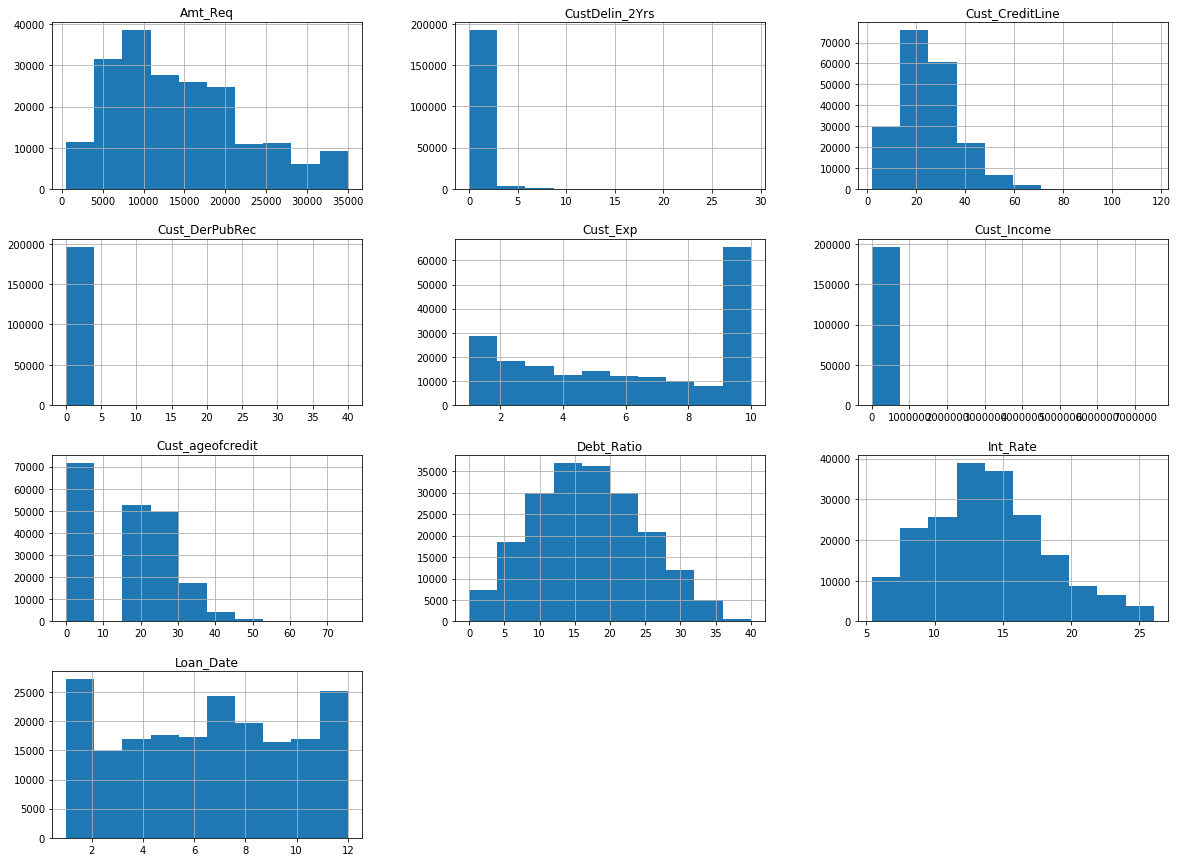

In [28]:
data3.hist(figsize=(20,15))
plt.show()

From the above plots, we can infer that certain variables are completely skewed and can be removed from further analysis. Such variables are CustDelin_2yrs and Cust_DerPubRec. Also this variables won't provide any information in determining the loan interest rates and can be dropped from final analysis. Also, Cust_Exp is not very useful features to determine if a person will get lower or higher interest rates hence we can drop this variable as well. 

Amt_Req tends to fall into nearly normal distribution pattern. It can be visualized in different plot as shown further below. Cust_CreditLine is rightly-skewed. Cust_Income histogram does not provide any useful information and can be visualized in better format as shown later. Cust_ageofcredit is an interesting plot, as it shows that none of the obervations fall into the range of around 8 to 14 years of age of credit. Debt_Ratio and Int_Rate follows normal distribution pattern. Loan_Date histogram is also visualized further below.

### Data Exploration: Amount of Loan Required
Required loan amount have a normal-like distribution but is right-skewed distribution.

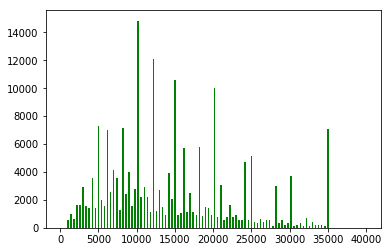

In [29]:
range = (0, 40000) 
bins = 100 
plt.hist(data3.Amt_Req, bins, range, color = 'green', 
        histtype = 'bar', rwidth = 0.5) 
plt.show()

### Data Exploration: Credit line of Customer
Customer Credt line have a rightly-skewed distribution.

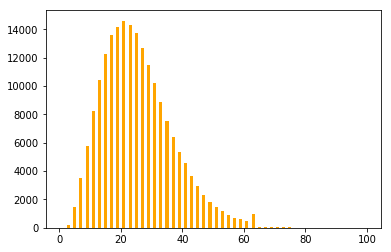

In [30]:
range = (0, 100) 
bins = 50 
plt.hist(data3.Cust_CreditLine, bins, range, color = 'orange', 
        histtype = 'bar', rwidth = 0.5) 
plt.show()

### Data Exploration: Income
Customer Income have a rightly-skewed distribution.

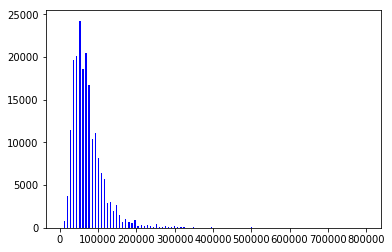

In [31]:
range = (1000, 800000) 
bins = 100
plt.hist(data3.Cust_Income, bins, range, color = 'blue', 
        histtype = 'bar', rwidth = 0.4) 
plt.show()

### Data Exploration: Interest Rates
Interest Rate have a normal-like distribution.

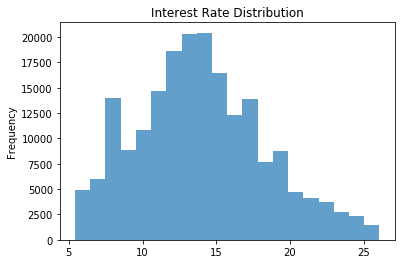

In [32]:
y = data3.Int_Rate
np.unique(y), pd.Series(y).plot(kind='hist',alpha=.7, bins=20, title='Interest Rate Distribution')
plt.show()

### Data Exploration: Loan Date
Loans given in each month(Loan_Date). It is normally distributed with highest numbers of loans given in the month of July.

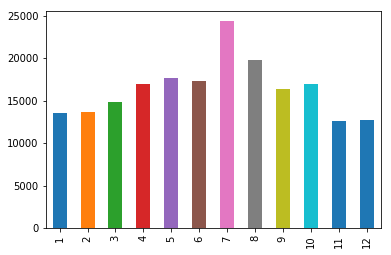

In [33]:
data3.Loan_Date.value_counts().sort_index().plot(kind='bar')

### Data Exploration: Box Plots
Another way to see the distribution in the variables which are float or integers, is to make boxplots using plot function with 'box' type. There are outliers in some of variables. In ideal scenario, we want to get rid of the outliers before we proceed further with the model. As the outliers tend to make the model bias. But for the purpose of this exercise, we will keep outlier as it is and proceed further with making the model.

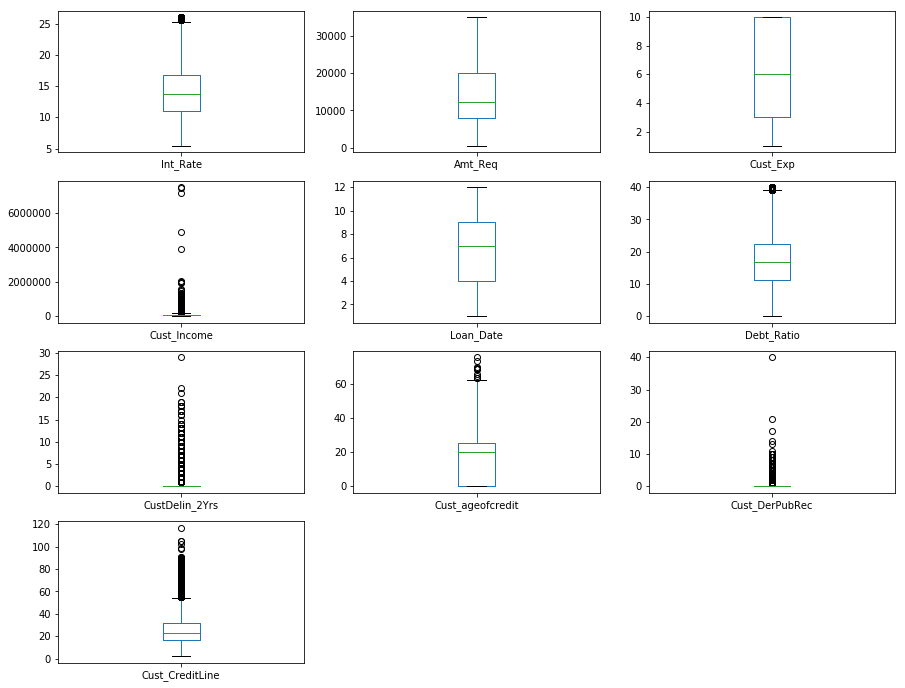

In [34]:
data3.plot(kind='box', subplots=True, layout=(4,3), figsize=(15, 12), sharex=False, sharey=False)
plt.show()

### Data Exploration: Categorical and Non-Integer Variables

### Data Exploration: Duration of Loan
We will keep this variable.

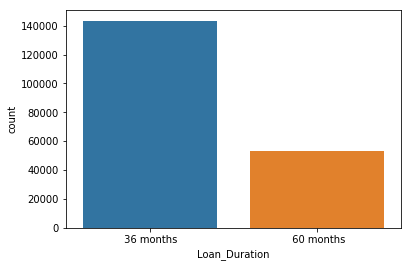

In [35]:
sns.countplot(data3['Loan_Duration'])

### Data Exploration: Grade of Loan
Grade of loan classified in descending order

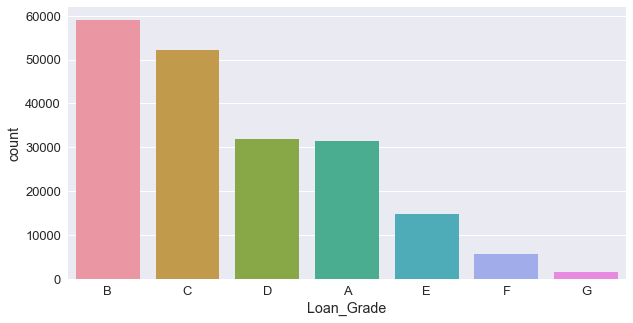

In [36]:
descending_order = data3["Loan_Grade"].value_counts().sort_values(ascending=False).index
from seaborn import set
set(font_scale=1.3)
figure(figsize=(10,5))
countplot(data=data3,x="Loan_Grade", order=descending_order)
show()

### Data Exploration: Ownership status
Status of ownership classified in descending order

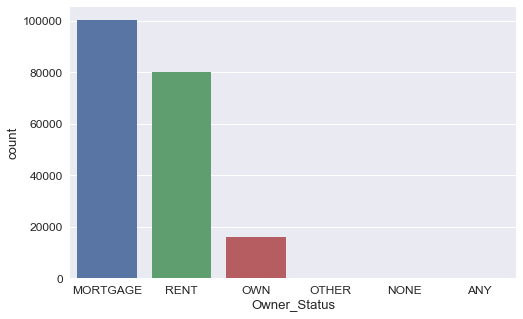

In [37]:
descending_order = data3["Owner_Status"].value_counts().sort_values(ascending=False).index
from seaborn import set
set(font_scale=1.2)
figure(figsize=(8,5))
countplot(data=data3,x="Owner_Status", order=descending_order)
show()

### Data Exploration: Category of Loan
Grade of loan classified in descending order. This variable cannot provide any information on interest rate of loans and 
hence we will drop this variable.

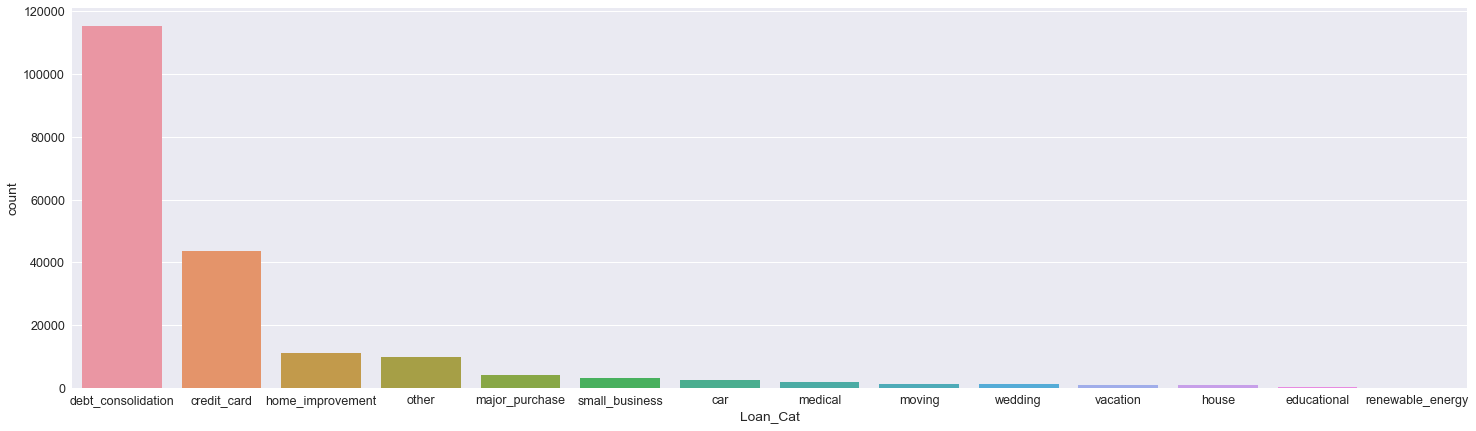

In [38]:
descending_order = data3["Loan_Cat"].value_counts().sort_values(ascending=False).index
from seaborn import set
set(font_scale=1.25)
figure(figsize=(25,7))
countplot(data=data3,x="Loan_Cat", order=descending_order)
show()

### Data Exploration: State of Customer
State of the customer classified in descending order. This variable can provide us demographics about customer but doesn't 
provide any insight into interest rate of loan for the customer. Hence we wukk drop this variable.

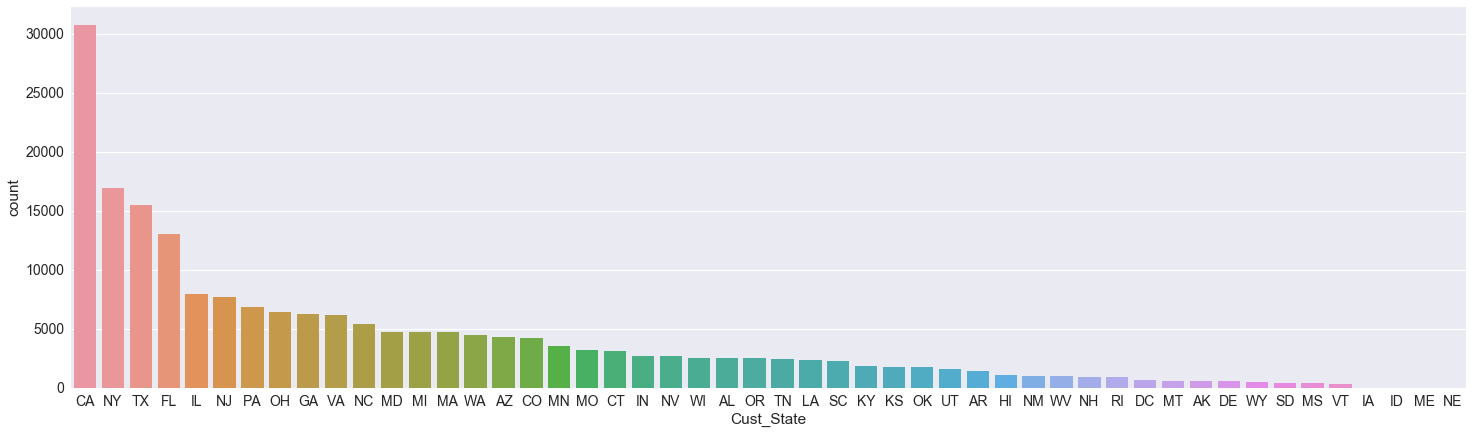

In [39]:
descending_order = data3["Cust_State"].value_counts().sort_values(ascending=False).index
from seaborn import set
set(font_scale=1.4)
figure(figsize=(25,7))
countplot(data=data3,x="Cust_State", order=descending_order)
show()

### Data Exploration: Loan Status
Loan status of the customer.This variable doesn't provide any useful information hence we will drop it.

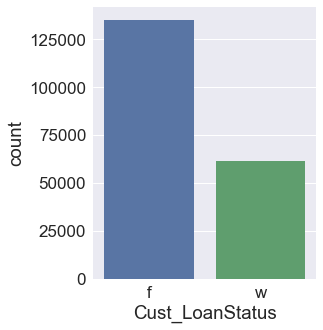

In [40]:
descending_order = data3["Cust_LoanStatus"].value_counts().sort_values(ascending=False).index
from seaborn import set
set(font_scale=1.7)
figure(figsize=(4,5))
countplot(data=data3,x="Cust_LoanStatus", order=descending_order)
show()

#### Removing all the columns based on data exploration.

In [41]:
data4 = data3.drop(['Cust_State', 'Cust_LoanStatus','Cust_Exp','CustDelin_2Yrs','Cust_DerPubRec','Loan_Cat'], axis=1)

### Generating dummy variables for categorical variables.

In [42]:
final = pd.get_dummies(data4)
final.head()

,Int_Rate,Amt_Req,Cust_Income,Loan_Date,Debt_Ratio,Cust_ageofcredit,Cust_CreditLine,Loan_Duration_ 36 months,Loan_Duration_ 60 months,Loan_Grade_A,...,Loan_Grade_D,Loan_Grade_E,Loan_Grade_F,Loan_Grade_G,Owner_Status_ANY,Owner_Status_MORTGAGE,Owner_Status_NONE,Owner_Status_OTHER,Owner_Status_OWN,Owner_Status_RENT
0,11.89,25000.0,85000.0,8,19.48,25.430137,42.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10.71,7000.0,65000.0,5,14.29,18.761644,7.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,16.99,25000.0,70000.0,8,10.50,19.095890,17.0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
3,13.11,1200.0,54000.0,3,5.47,34.520548,31.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,13.57,10800.0,32000.0,11,11.63,22.597260,40.0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


# 2) Building and Running Machine Learning model
## Feature Scaling and Train Test Split of the Original Data
### When all the variables are not in the same scale, it is often the case that the model doesnt learn well from these features. Hence we need to ensure that all the variables are in the same scale. In our case we use the min max scaling method in which all variables are adjusted in such a way that they are between 0 and 1.

In [43]:
### Train Test Split of Original Data ###########################

X = final.drop(['Int_Rate'],axis=1)
Y = final['Int_Rate']

from sklearn.model_selection import train_test_split
X_train_org,X_test_org,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state =20)

#################################### Feature Scaling ###########################################

#When all the variables are not in the same scale, it is often the case that the model doesnt 
#learn well from these features.
#Hence we need to ensure that all the variables are in the same scale. 
#In our case we use the standardized scaling method in which all variables are adjusted in 
#a way that they have unit variance. 

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org) 

## Linear Regression Analysis

Training Score 0.91837656
Test Score 0.91789549
Train Cross Validation Score -1080716198792682496.00000000
Test Cross Validation Score 0.91776123


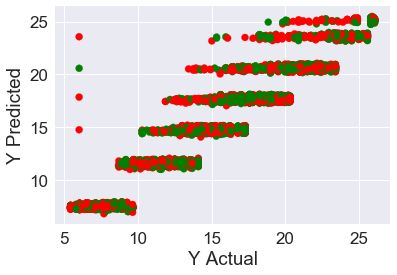

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

linreg_regr = LinearRegression()
fitted = linreg_regr.fit(X_train,Y_train)
y_pred_linreg = fitted.predict(X_test)
print('Training Score {:.8f}'.format(fitted.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(fitted.score(X_test,Y_test)))

rmse_linreg = sqrt(mean_squared_error(Y_test, y_pred_linreg))

from sklearn.model_selection import cross_val_score
scores_linreg_train = cross_val_score(linreg_regr,X_train,Y_train,cv=5)
scores_linreg_test = cross_val_score(linreg_regr,X_test,Y_test,cv=5)
print('Train Cross Validation Score {:.8f}'.format(np.mean(scores_linreg_train)))
print('Test Cross Validation Score {:.8f}'.format(np.mean(scores_linreg_test)))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_linreg,color=['red','green'])
plt.show()


## Ridge Regression with Cross Validation and Grid Search(alpha param)

Training Score 0.91837683
Test Score 0.91789688
Best parameters{'alpha': 1}
Best score 0.91834985


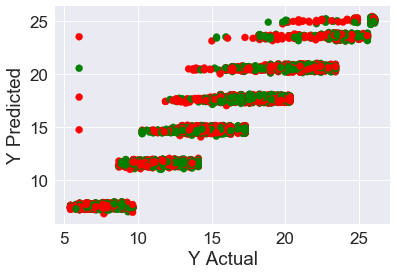

In [45]:

from sklearn.linear_model import Ridge
ridge_regr = Ridge()
ridge_regr.fit(X_train,Y_train)
print('Training Score {:.8f}'.format(ridge_regr.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(ridge_regr.score(X_test,Y_test)))


from sklearn.model_selection import GridSearchCV
ridge_cv = Ridge()
param_grid = {'alpha': [0.01,1,5,10,100,2000]}
grid_search = GridSearchCV(ridge_cv,param_grid,cv=5)
grid_search.fit(X_train,Y_train)
              
y_pred_ridge = grid_search.predict(X_test)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.8f}'.format(grid_search.best_score_))  

rmse_ridge = sqrt(mean_squared_error(Y_test,y_pred_ridge))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_ridge,color=['red','green'])
plt.show()

## Lasso Regression with Cross Validation and Grid Search(alpha param)


Training Score 0.01326829
Test Score 0.01326802
Best parameters{'alpha': 1}
Best Score 0.01320903


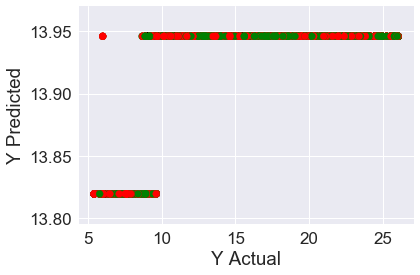

In [46]:
from sklearn.linear_model import Lasso
lasso_regr = Lasso(max_iter = 100000)
lasso_regr.fit(X_train,Y_train)
print('Training Score {:.8f}'.format(lasso_regr.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(lasso_regr.score(X_test,Y_test)))


from sklearn.model_selection import GridSearchCV
lasso_cv = Lasso(max_iter = 100000)
param_grid = {'alpha':[1,5,10,20,100,2000]}
grid_search_ls = GridSearchCV(lasso_cv,param_grid,cv = 5)
grid_search_ls.fit(X_train,Y_train)  
            
y_pred_lasso = grid_search_ls.predict(X_test)              

print('Best parameters{}'.format(grid_search_ls.best_params_))
print('Best Score {:.8f}'.format(grid_search_ls.best_score_))

rmse_lasso = sqrt(mean_squared_error(Y_test,y_pred_lasso))

         


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_lasso,color=['red','green'])
plt.show()

## KNN Regressor

Training Score 0.93923888
Test Score 0.90807783
Train Cross Validation Score 0.90856184
Test Cross Validation Score 0.90721222


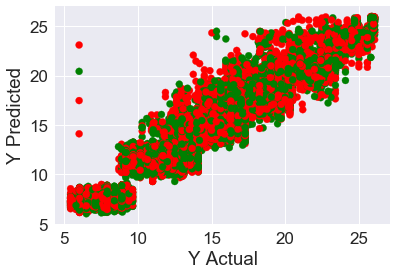

In [47]:

from sklearn.neighbors import KNeighborsRegressor

knn_regr = KNeighborsRegressor(n_neighbors = 5).fit(X_train,Y_train)
y_pred_knn = knn_regr.predict(X_test)
print('Training Score {:.8f}'.format(knn_regr.score(X_train,Y_train)))
print('Test Score {:.8f}'.format(knn_regr.score(X_test,Y_test)))


from sklearn.model_selection import cross_val_score
scores_knn_train = cross_val_score(knn_regr,X_train,Y_train,cv=5)
scores_knn_test = cross_val_score(knn_regr,X_test,Y_test,cv=5)
print('Train Cross Validation Score {:.8f}'.format(np.mean(scores_knn_train)))
print('Test Cross Validation Score {:.8f}'.format(np.mean(scores_knn_test)))

rmse_knn = sqrt(mean_squared_error(Y_test,y_pred_knn))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_knn,color=['red','green'])
plt.show()



## Polynomial Features with Linear and Ridge Regressors

### 1) Linear Regression with Polynomial features


Training Score 0.92087501
Test Score 0.92043897


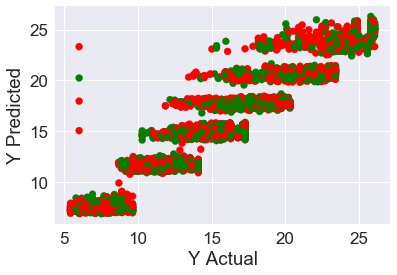

In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
data_test_poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


from sklearn.linear_model import LinearRegression
linreg_poly = LinearRegression()
fit_linreg_poly = linreg_poly.fit(X_train_poly,Y_train)
y_pred_polylin = fit_linreg_poly.predict(X_test_poly)
print('Training Score {:.8f}'.format(fit_linreg_poly.score(X_train_poly,Y_train)))
print('Test Score {:.8f}'.format(fit_linreg_poly.score(X_test_poly,Y_test)))


rmse_polylin = sqrt(mean_squared_error(Y_test,y_pred_polylin))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_polylin,color=['red','green'])
plt.show()





### 2) Ridge Regression with Polynomial Features


Training Score 0.92
Test Score 0.92
Best parameters{'alpha': 1}
Best score 0.91834985
Train Cross Validation Score -2388976051989478912.00000000
Test Cross Validation Score -4398082067744546816.00000000


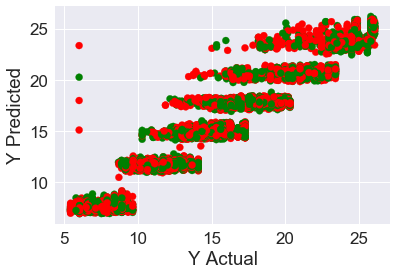

In [49]:
from sklearn.linear_model import Ridge
ridge_poly = Ridge()
fit_ridge_poly = ridge_poly.fit(X_train_poly,Y_train)
print('Training Score {:.2f}'.format(fit_ridge_poly.score(X_train_poly,Y_train)))
print('Test Score {:.2f}'.format(fit_ridge_poly.score(X_test_poly,Y_test)))


from sklearn.model_selection import GridSearchCV
poly_ridge_cv = Ridge()
param_grid = {'alpha': [0.01,1,5,10,100,2000]}
grid_search_polyridge = GridSearchCV(poly_ridge_cv,param_grid,cv=5)
grid_search_polyridge.fit(X_train_poly,Y_train)
              
y_pred_polyridge = grid_search_polyridge.predict(X_test_poly)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.8f}'.format(grid_search.best_score_))  

from sklearn.model_selection import cross_val_score
scores_linreg_poly_train = cross_val_score(linreg_poly,X_train_poly,Y_train,cv=5)
scores_linreg_poly_test = cross_val_score(linreg_poly,X_test_poly,Y_test,cv=5)
print('Train Cross Validation Score {:.8f}'.format(np.mean(scores_linreg_poly_train)))
print('Test Cross Validation Score {:.8f}'.format(np.mean(scores_linreg_poly_test)))

rmse_ridgepoly = sqrt(mean_squared_error(Y_test,y_pred_polyridge))


import matplotlib.pyplot as plt

plt.figure()
plt.xlabel('Y Actual')
plt.ylabel('Y Predicted')
plt.scatter(Y_test,y_pred_polyridge,color=['red','green'])
plt.show()

### Summary
Data provided consist of 27 variables related to customer profiles and their loans. Some of the most important variables include
interest rates of loans, amount of loan funded, age of credit, etc. In the given data, the idea would be to predict interest ratesof loans for customers based on the variables provided.

However, the number of useful variables in the dataset are very few. We can get a predictive model based on the given variable but the model won't be very reliable in real-life scenario because we are missing some of the very key variables, one of such variable being Fico credit score. Also, in the current data set, lots of values were missing from critical variables so that decreases the size of usable dataset.The variable 'age of credit' has several values in negative, which means their credit started in august or later months than today. And we know that it is not possible. So it seems that this variable has incorrect data for several customers.

Some of the most important variables in the dataset are interest rates, amount required, income, date of loan, Debt to credit ratio, age of credit, grade of loan, credit line and ownership status. As we can see that KNN model seem to be the best model from few models tested above. To have even better prediction model, it would be good to have data regarding fico scores, previous loan history,current loan status, credit utilization, record of public bankruptcies and similar variables.